1. Pearson correlation 

Tham khảo: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

Trong ví dụ dưới, Ta có dữ liệu chiều dài và chiều rộng của lúa mì. Ta cho rằng chúng có tương quan với nhau. Ta sử dụng Pearson correlation để kiểm tra:
- correlation(x,y) nằm trong khoảng -1 đến 1
- correlation = 0 nếu không tương quan
- correlation = 1, -1 x, y tương quan tuyến tính
- correlation >0 thì x tăng, y tăng
- correlation <0 thì x tăng, y giảm


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

grains = pd.read_csv('Grains/seeds-width-vs-length.csv', header = None)
grains.head()

,0,1
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


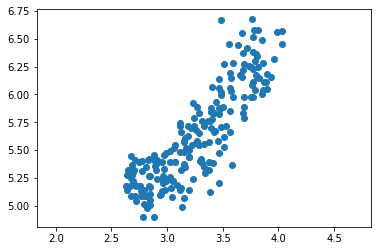

Pearson correlation =  0.8604149377143466


In [8]:
width = grains.values[:,0]
length = grains.values[:, 1]

plt.scatter( width, length)
plt.axis('equal')
plt.show()

correlation, pvalue = pearsonr(width, length)
print('Pearson correlation = ',correlation)

Ta sử dụng PCA (phân tích thành phần chính) với dữ liệu grains và xem mức tương quan sau khi áp dụng PCA 

Tham khảo: https://machinelearningcoban.com/2017/06/15/pca/

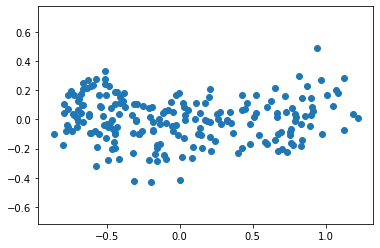

Pearson correlation =  1.919037845299343e-17


In [9]:
from sklearn.decomposition import PCA

model = PCA()
pca_features = model.fit_transform(grains) # kết hợp model.fit(data) và model.transform(data)

xs = pca_features[:,0]
ys = pca_features[:,1]

plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

correlation, pvalue = pearsonr(xs, ys)
print('Pearson correlation = ',correlation)

- Sau khi áp dụng PCA, chiều dài và chiều rộng gần như không có sự tương quan lẫn nhau!! 
- Thành phần chính đầu tiên là hướng mà dữ liệu thay đổi nhiều nhất.
- Ta sẽ dùng PCA để tìm các thành phần chính và biểu diễn nó thành mũi tên

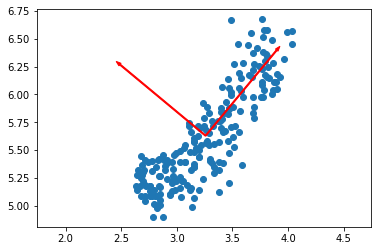

In [13]:
plt.scatter(grains.values[:,0], grains.values[:,1])

model = PCA()
model.fit(grains)
mean = model.mean_
first_pc = model.components_[0,:]
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

second_pc = model.components_[1,:]
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='red', width=0.01)

plt.axis('equal')
plt.show()

Chúng ta thấy PCA giống như 1 phép đổi trục tọa độ cho dữ liệu, bời vì dữ liệu có xu hướng nàm trên 1 bề mặt nào đó, ví dụ ở đây được biểu diễn bởi thành phần chính số 1. Phép đổi trục này không ảnh hưởng đến dữ liệu và khi đó mean = 0

PCA sẽ giúp chúng ta nhìn nhận được kích thước nội tại của data, ví dụ với dữ liệu fish có shape(.., 6), ta xem kích thước nội tại của nó là gì?

In [23]:
samples = pd.read_csv('fish.csv',header = None)
display(samples.head())
samples = samples.drop(0, axis =1).values

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


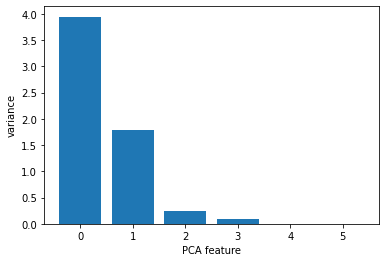

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scale = StandardScaler()
pca = PCA()

pipeline = make_pipeline(scale , pca)
pipeline.fit(samples)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Ta thấy sau khi áp dụng PCA, và biểu diễn phương sai của từng feature lên biểu đồ, ta thấy kích thước nội tại (là nơi phương sai thay đổi đáng kể) là 2 hoặc 3! Vậy làm thế nào để giảm kích thước data? Chúng ta cùng xem

In [26]:
pca = PCA(n_components=2) # Lựa chọn số thành phần = 2
scale = StandardScaler()

pipeline = make_pipeline(scale , pca)

pca_features = pca.fit_transform(samples)
pca_features.shape

(85, 2)

[TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn-feature-extraction-text-tfidfvectorizer) : Chuyển đổi 1 văn bản thành 1 ma trận TF-IDF features

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

tfidf = TfidfVectorizer()
csr_mat = tfidf.fit_transform(documents)
# Print result of toarray() method
print(csr_mat.toarray())
# Get the words: words
words = tfidf.get_feature_names()
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


[TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html): giảm kích thước dữ liệu giống PCA, nhưng không thực hiện bước chuyển trục về mean =0

In [40]:
import numpy as np

df = pd.read_csv('Wikipedia articles/wikipedia-vectors.csv')
display(df.head())
titles = df.columns.values
articles = df.values
articles = np.transpose(articles)
print(titles.shape, articles.shape)

,Unnamed: 0,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


(61,) (61, 13125)


Ta thấy data có 13125 chiều --> ta giảm kích thước xuống 50 và phân các sample thành 6 cụm. 

In [41]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(n_components=50)
kmeans = KMeans(n_clusters=6)

pipeline = make_pipeline(svd, kmeans)
pipeline.fit(articles)
labels = pipeline.predict(articles)

df = pd.DataFrame({'label': labels, 'article': titles})
print(df.sort_values('label'))

    label                article
60      0            Adam Levine
58      0  Red Hot Chili Peppers
57      0               Skrillex
56      0          Black Sabbath
55      0         Arctic Monkeys
..    ...                    ...
9       5                Firefox
42      5            Hepatitis B
41      5            Tonsillitis
49      5             Gabapentin
43      5            Doxycycline

[61 rows x 2 columns]
